In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/My Drive

/content/gdrive/My Drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("ty13to17.xlsx", sheet_name=0)
y = list(df['value'])

In [ ]:
x = [i for i in range(1, 262)]

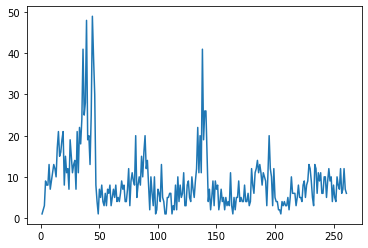

In [ ]:
plt.plot(x,y)

In [ ]:
y1 = []
for i in range(len(y)):
  if (y[i]<22):
    y1.append(y[i]) 

In [ ]:
x1 = [i for i in range(1, len(y1)+1)]

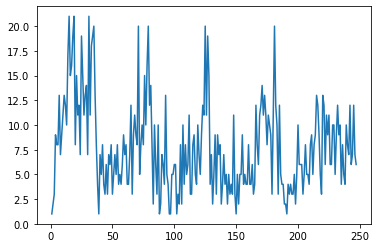

In [ ]:
plt.plot(x1,y1)

In [ ]:
data = pd.DataFrame()
# data['Week'] = x
data['Cases'] = y

data1 = pd.DataFrame()
# data1['Week'] = x1
data1['Cases'] = y1

In [ ]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)
data_scaled1= scalar.fit_transform(data1)

In [ ]:
data_scaled.shape

(261, 1)

In [ ]:
steps = 6
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

inp=np.asanyarray(inp)
out=np.asanyarray(out)

x_train = inp[:208,:,:]
x_test = inp[208:,:,:]    
y_train = out[:208]    
y_test= out[208:]

In [ ]:
inp.shape

(255, 6, 1)

In [ ]:
x_train.shape

(208, 6, 1)

In [ ]:
y_train.shape

(208, 1)

In [ ]:
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [ ]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(6,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(6))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(15,6)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(units=16, activation='linear'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

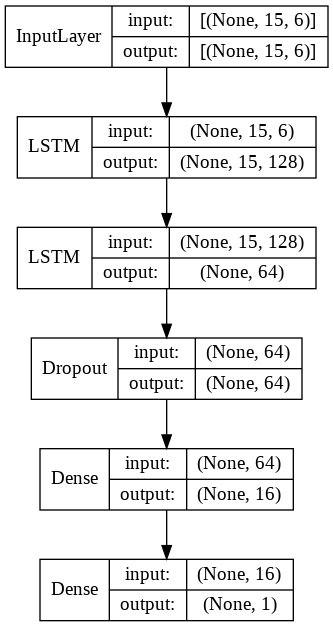

In [ ]:
plot_model(model, show_layer_names=False, show_shapes=True)

In [ ]:
history = model.fit(x_train,y_train,epochs=300, verbose=1, callbacks = [early_stop] )

Epoch 1/300
7/7 [==============================] - 0s 42ms/step - loss: 0.4847
Epoch 2/300
7/7 [==============================] - 0s 40ms/step - loss: 0.2507
Epoch 3/300
7/7 [==============================] - 0s 40ms/step - loss: 0.1246
Epoch 4/300
7/7 [==============================] - 0s 41ms/step - loss: 0.1076
Epoch 5/300
7/7 [==============================] - 0s 42ms/step - loss: 0.1052
Epoch 6/300
7/7 [==============================] - 0s 38ms/step - loss: 0.1000
Epoch 7/300
7/7 [==============================] - 0s 40ms/step - loss: 0.0938
Epoch 8/300
7/7 [==============================] - 0s 38ms/step - loss: 0.0869
Epoch 9/300
7/7 [==============================] - 0s 40ms/step - loss: 0.0799
Epoch 10/300
7/7 [==============================] - 0s 43ms/step - loss: 0.0708
Epoch 11/300
7/7 [==============================] - 0s 40ms/step - loss: 0.0674
Epoch 12/300
7/7 [==============================] - 0s 40ms/step - loss: 0.0639
Epoch 13/300
7/7 [==============================]

In [ ]:
model.save("./regressor.hdf5")

In [ ]:
predict = model.predict(x_test)

In [ ]:
predict = scalar.inverse_transform(predict)

In [ ]:
Ytesting = scalar.inverse_transform(y_test)

In [ ]:
predict = np.ndarray.round(predict)
Ytesting = np.ndarray.round(Ytesting)

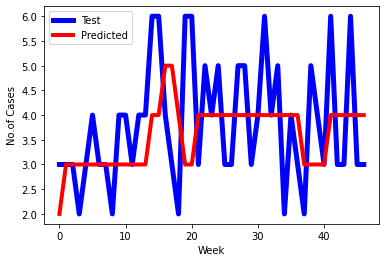

In [ ]:
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.xlabel('Week')
plt.ylabel('No.of Cases')
plt.legend(('Test','Predicted'))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

In [ ]:
import math
math.sqrt(1.68085)

1.2964759928359646

After removng outliers... ignore

Epoch 1/300
7/7 [==============================] - 0s 39ms/step - loss: 0.3124
Epoch 2/300
7/7 [==============================] - 0s 38ms/step - loss: 0.2222
Epoch 3/300
7/7 [==============================] - 0s 38ms/step - loss: 0.2055
Epoch 4/300
7/7 [==============================] - 0s 39ms/step - loss: 0.2071
Epoch 5/300
7/7 [==============================] - 0s 38ms/step - loss: 0.1849
Epoch 6/300
7/7 [==============================] - 0s 38ms/step - loss: 0.1710
Epoch 7/300
7/7 [==============================] - 0s 38ms/step - loss: 0.1612
Epoch 8/300
7/7 [==============================] - 0s 40ms/step - loss: 0.1575
Epoch 9/300
7/7 [==============================] - 0s 38ms/step - loss: 0.1479
Epoch 10/300
7/7 [==============================] - 0s 38ms/step - loss: 0.1448
Epoch 11/300
7/7 [==============================] - 0s 39ms/step - loss: 0.1452
Epoch 12/300
7/7 [==============================] - 0s 38ms/step - loss: 0.1387
Epoch 13/300
7/7 [==============================]

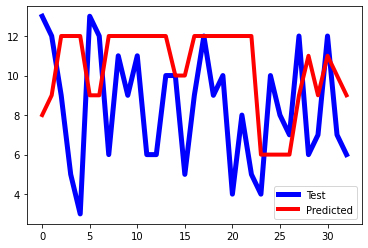

In [ ]:
steps = 6
inp1 = []
out1 = []
for i in range(len(data_scaled1) - (steps)):
    inp1.append(data_scaled1[i:i+steps])
    out1.append(data_scaled1[i+steps])

inp1=np.asanyarray(inp1)
out1=np.asanyarray(out1)

x_train1 = inp1[:208,:,:]
x_test1 = inp1[208:,:,:]    
y_train1 = out1[:208]    
y_test1 = out1[208:]

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model1 = Sequential()
model1.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(6,1)))
model1.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(RepeatVector(6))
model1.add(LSTM(units=100, return_sequences=True, activation='relu'))
model1.add(Dropout(0.2))
model1.add(LSTM(units=100, return_sequences=True, activation='relu'))
model1.add(Dropout(0.2))
model1.add(LSTM(units=100, return_sequences=True, activation='relu'))
model1.add(LSTM(units=100, return_sequences=True, activation='relu'))
model1.add(Bidirectional(LSTM(128, activation='relu')))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(1))
model1.compile(loss='mse', optimizer='adam')

history1 = model1.fit(x_train1,y_train1,epochs=300, verbose=1, callbacks = [early_stop] )

model1.save("./regressor1.hdf5")
predict1 = model1.predict(x_test1)
predict1 = scalar.inverse_transform(predict1)
Ytesting1 = scalar.inverse_transform(y_test1)

predict1 = np.ndarray.round(predict1)
Ytesting1 = np.ndarray.round(Ytesting1)

plt.plot(Ytesting1 , 'blue', linewidth=5)
plt.plot(predict1,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting1, predict1)

17.545454545454547